# Add title here.

*Add text here.*

## Analysis setup

*Before attempting to run this Julia code, make sure your computer is properly set up to run this code by following the "Quick Start" instructions in the README of the [git repository](https://github.com/stephenslab/mixsqp-paper).*

We begin by loading the Distributions, LowRankApprox and RCall Julia packages, as well as some function definitions used in the code chunks below.

In [2]:
using Distributions
using LowRankApprox
using RCall
include("../code/datasim.jl");
include("../code/likelihood.jl");
include("../code/mixSQP.jl");
include("../code/REBayes.jl");
include("../code/ash.jl");

*Add text here.*

In [ ]:
mult = 1.1;
n    = round.(Int,[5e4, 1e5, 1.5e5, 2e5, 2.5e5]);

## Create data sets and run adaptive shrinkage with mixSQP

*Add text here.*

In [6]:
x = normtmixdatasim(round(Int,5e4));
function sim(n; method = "mixSQP", mult = 1.1)
    srand(1);
    x = [randn(n_half);3*randn(n-n_half)]; s = ones(n);
    out = ash(x,s, mult = mult, method = method, lowrank = "qr")[5];
end

##  Run adaptive shrinkage with REBayes

In [7]:
t1 = sim(1000, method = "REBayes"); # check if works well

n = round.(Int, linspace(5e4,25e4,5));

for i = 1:length(n)
    t1 = [t1 sim(n[i], method = "REBayes")];
end
t1 = t1[:,2:end]';

## Plot results

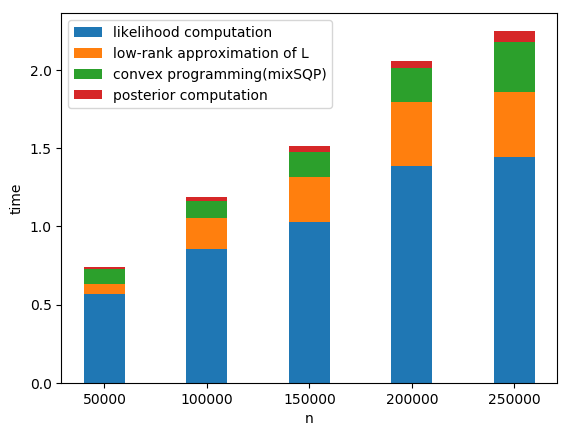

PyObject <matplotlib.legend.Legend object at 0x14d6cfb10>

In [18]:
fig, ax = subplots()
ax[:bar](n,t[:,1], width=2e4)
ax[:bar](n,t[:,2], bottom = t[:,1], width=2e4)
ax[:bar](n,t[:,3], bottom = sum(t[:,1:2],2)[:], width=2e4)
ax[:bar](n,t[:,4], bottom = sum(t[:,1:3],2)[:], width=2e4)
xlabel("n")
ylabel("time")
ax[:legend](["likelihood computation";"low-rank approximation of L";"convex programming(mixSQP)";"posterior computation"])

# they are in the same scale (time per n).
# For smaller n, other issues (e.g. memory allocation) take considerable amount of time.

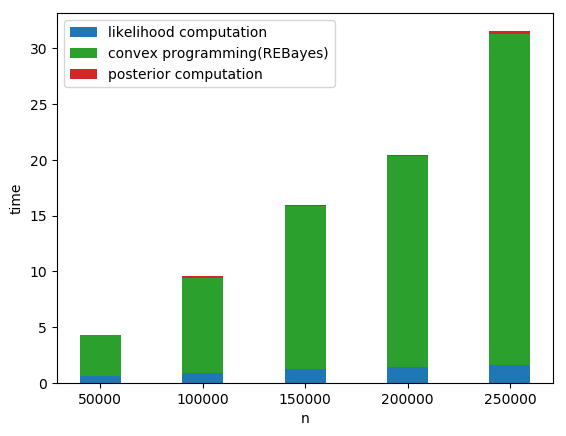

PyObject <matplotlib.legend.Legend object at 0x142f83a10>

In [9]:
fig, ax = subplots()
ax[:bar](n,t1[:,1], width=2e4)
ax[:bar](n,t1[:,2], bottom = t1[:,1], width=2e4, color = "C2")
ax[:bar](n,t1[:,3], bottom = sum(t1[:,1:2],2)[:], width=2e4, color = "C3")
xlabel("n")
ylabel("time")
ax[:legend](["likelihood computation";"convex programming(REBayes)";"posterior computation"])

# they are in the same scale (time per n).
# For smaller n, other issues (e.g. memory allocation) take considerable amount of time.

## Session information

The section gives information about the computing environment used to generate the results contained in this
notebook, including the version of Julia and the Julia packages. 

In [6]:
Pkg.status("LowRankApprox")
Pkg.status("DataFrames")
Pkg.status("PyPlot")
versioninfo()

 - LowRankApprox                 0.1.0
 - DataFrames                    0.10.1
 - PyPlot                        2.3.2
